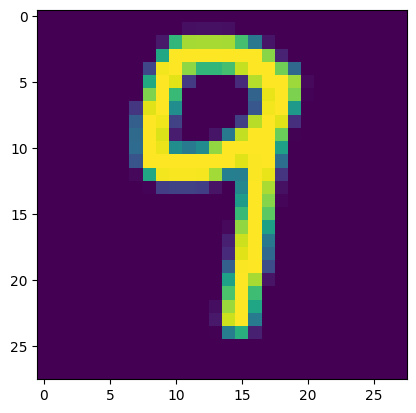

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


# Load modell
model = load_model('number_recognition_model_noisy_5.h5') 

def preprocess_image(image_path):
    # Load image with PiL 
    img = Image.open(image_path).convert('L')  # greyscale
    
    # Resize 28*28
    img = img.resize((28, 28))
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Invert to black number - white background => white number, black background
    img_array = 255 - img_array
    
    # Normalisation
    img_array = img_array / 255.0
    # reshape to modell
    img_tensor = img_array.reshape(1, 28, 28, 1)
    
    # Print image 
    import matplotlib.pyplot as plt 
    plt.imshow(img_tensor[0]) 
    plt.show() 
    
preprocess_image('9_6.png')

In [ ]:
import visualkeras

model = load_model('number_recognition_model_noisy_5.h5') 

visualkeras.layered_view(model).show() # display using your system viewer

visualkeras.layered_view(model)

ModuleNotFoundError: No module named 'visualkeras'